<a href="https://colab.research.google.com/github/alanmejiaa/Datos-Masivos/blob/main/Practica%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample
import random

In [45]:
# Carga de datos
lector = pd.read_csv('anime-filtered.csv', chunksize=10000)
datos = next(lector)
atributos = datos.columns

In [46]:
datos.head(5)

,anime_id,Name,Score,Genres,English name,Japanese name,sypnopsis,Type,Episodes,Aired,...,Duration,Rating,Ranked,Popularity,Members,Favorites,Watching,Completed,On-Hold,Dropped
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,"In the year 2071, humanity has colonized sever...",TV,26,"Apr 3, 1998 to Apr 24, 1999",...,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,1251960,61971,105808,718161,71513,26678
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,"other day, another bounty—such is the life of ...",Movie,1,"Sep 1, 2001",...,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,273145,1174,4143,208333,1935,770
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,"Vash the Stampede is the man with a $$60,000,0...",TV,26,"Apr 1, 1998 to Sep 30, 1998",...,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,558913,12944,29113,343492,25465,13925
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),ches are individuals with special powers like ...,TV,26,"Jul 2, 2002 to Dec 24, 2002",...,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,94683,587,4300,46165,5121,5378
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,It is the dark century and the people are suff...,TV,52,"Sep 30, 2004 to Sep 29, 2005",...,23 min. per ep.,PG - Children,3710.0,4369,13224,18,642,7314,766,1108


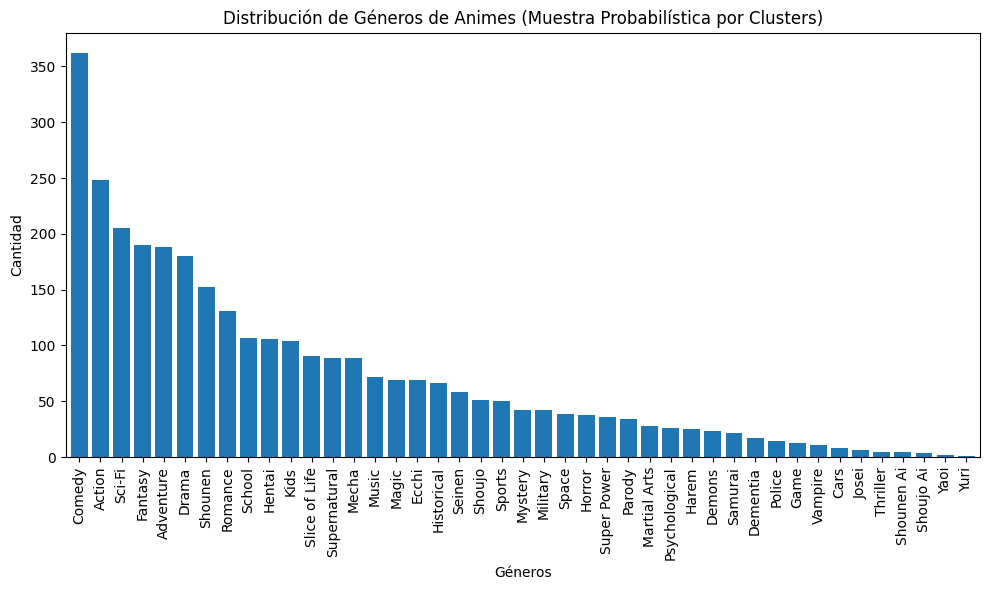

In [100]:
X_resampled, y_resampled = resample(X, y,
                                    replace=True,
                                    n_samples=1000,
                                    random_state=42,
                                    stratify=y)

df_resampled = X_resampled.copy()
df_resampled['anime_id'] = y_resampled

plt.figure(figsize=(10, 6))
ax = df_resampled['Genres'].str.split(', ').explode().value_counts().plot(kind='bar', width=0.8)  # Ajusta el ancho de las barras
plt.xlabel('Géneros')
plt.ylabel('Cantidad')
plt.title('Distribución de Géneros de Animes (Muestra Probabilística por Clusters)')
plt.xticks(rotation=90)  # Cambio a 90 grados
plt.tight_layout()
plt.show()

In [96]:
cuotas = {
    'Genres': {'Action': 40, 'Comedy': 30, 'Drama': 30},
    'Type': {'TV': 50, 'Movie': 30, 'OVA': 20}
    # Agrega las cuotas para las otras variables...
}

In [97]:
muestra_cuotas = []
contador_datos = 0

In [98]:
def cumplir_cuotas(muestra_cuotas, cuotas):
    for variable, categorias in cuotas.items():
        for categoria, cuota in categorias.items():
            if sum(1 for row in muestra_cuotas if row[variable] == categoria) >= cuota:
                return True
    return False

In [ ]:
while contador_datos < 1000:
    for _, row in df.iterrows():
        participante = {
            'anime_id': row['anime_id'],
            'Name': row['Name'],
            'Score': row['Score'],
            'Genres': row['Genres'],
            'Type': row['Type'],
            'Episodes': row['Episodes'],
            'Aired': row['Aired'],
            # Agrega las otras variables necesarias...
        }
        if not cumplir_cuotas(muestra_cuotas, cuotas):
            muestra_cuotas.append(participante)
            contador_datos += 1
        if contador_datos >= 1000: #1000
            break

In [ ]:
df_muestra_cuotas = pd.DataFrame(muestra_cuotas)

In [ ]:
# Cálculo y comparación de estadísticas de popularidad
print("Estadísticas del Muestreo Probabilístico por Clusters:")
print(df_resampled["Popularity"].mean())
print(df_resampled["Popularity"].std())
print("Estadísticas del Muestreo No Probabilístico con Cuotas:")
print(df_muestra_cuotas["Popularity"].mean())
print(df_muestra_cuotas["Popularity"].std())